# Twitter Disaster Analysis



Importando os dados

Perguntas que vão surgindo:
* Devo fazer a análise de dados com todos os dados (treino e teste) ou apenas com os dados de treino para depois validar no teste? (Na dúvida vou fazer apenas com os dados de treino)
* Uma ideia é transformar os campos keyword e location em mais 2 features. Onde tem NaN = 0, e se tiver algum valor =1.
* O que consigo extrair dessa base de dados?
* Quais locais tem mais tweets?
* Fazer uma nuvem de palavras em Keyword
* Como preprocessar esses dados?

#### importando bibliotecas e arquivos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#reading data
path = './data/'

df = pd.read_csv(path+'train.csv')
df_test = pd.read_csv(path+'test.csv')

### Primeiras impressões sobre os dados

Informações básicas dos dados. Pode-se observar que há 5 colunas e que há alguns campos não preenchidos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


0.8% tweets não possuem keyword e 33.27% tweets não possuem localização. É possível criar uma variável "tem localização" com 1 indicando que sim e 0 indicando que não, e verificar se isso aumenta o poder preditivo do modelo. O mesmo pode ser feito com keyword. E apenas depois utilizá-las ou não.

In [3]:
keyword_size = df['keyword'].size
keyword_nan = df.isnull().sum()['keyword']

location_size = df['location'].size
location_nan = df.isnull().sum()['location']

print('Temos {:.1f} % dos tweets sem keywords'.format(100*keyword_nan/keyword_size))
print('Temos {:.2f} % dos tweets sem localização'.format(100*location_nan/location_size))

Temos 0.8 % dos tweets sem keywords
Temos 33.27 % dos tweets sem localização


### Preprocessing Data

In [10]:
#convert location from object to string type
df['location'] = df['location'].astype('str')
df_test['location'] = df_test['location'].astype('str')

#convert keyword from object to string type
df['keyword'] = df['keyword'].astype('str')
df_test['keyword'] = df_test['keyword'].astype('str')

#remove 'nan' to empty string ''
df['location'] = df['location'].apply(lambda x: '' if x=='nan' else x)
df['keyword'] = df['keyword'].apply(lambda x: '' if x=='nan' else x)

df['text'] = df['text'].apply(lambda x: x.lower)

### Feature engineering

In [5]:
# Criando a coluna "tem localização"
df['there is location'] = df['location'].apply(lambda x: 1 if x else 0)
df_test['there is location'] = df_test['location'].apply(lambda x: 1 if x else 0)

#Criando a coluna "tem keyword"
df['there is keyword'] = df['keyword'].apply(lambda x: 1 if x else 0)
df_test['there is keyword'] = df_test['keyword'].apply(lambda x: 1 if x else 0)

In [7]:
df['there is keyword'].value_counts()

1    7552
0      61
Name: there is keyword, dtype: int64

## Data visualization

<AxesSubplot:xlabel='there is keyword', ylabel='count'>

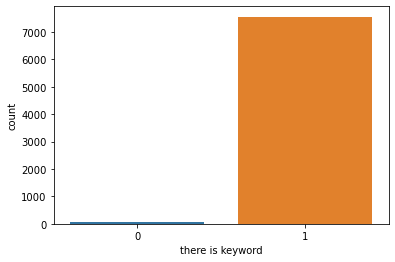

In [8]:
sns.countplot(data=df, x='there is keyword')

<AxesSubplot:xlabel='there is location', ylabel='count'>

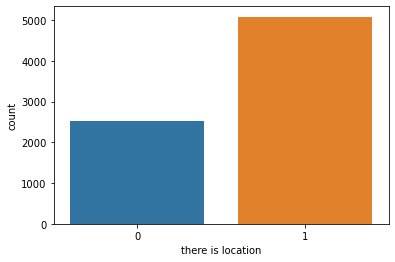

In [9]:
sns.countplot(data=df, x='there is location')